In [ ]:
%matplotlib inline

# Distribuzione dei file all'interno del Dataset

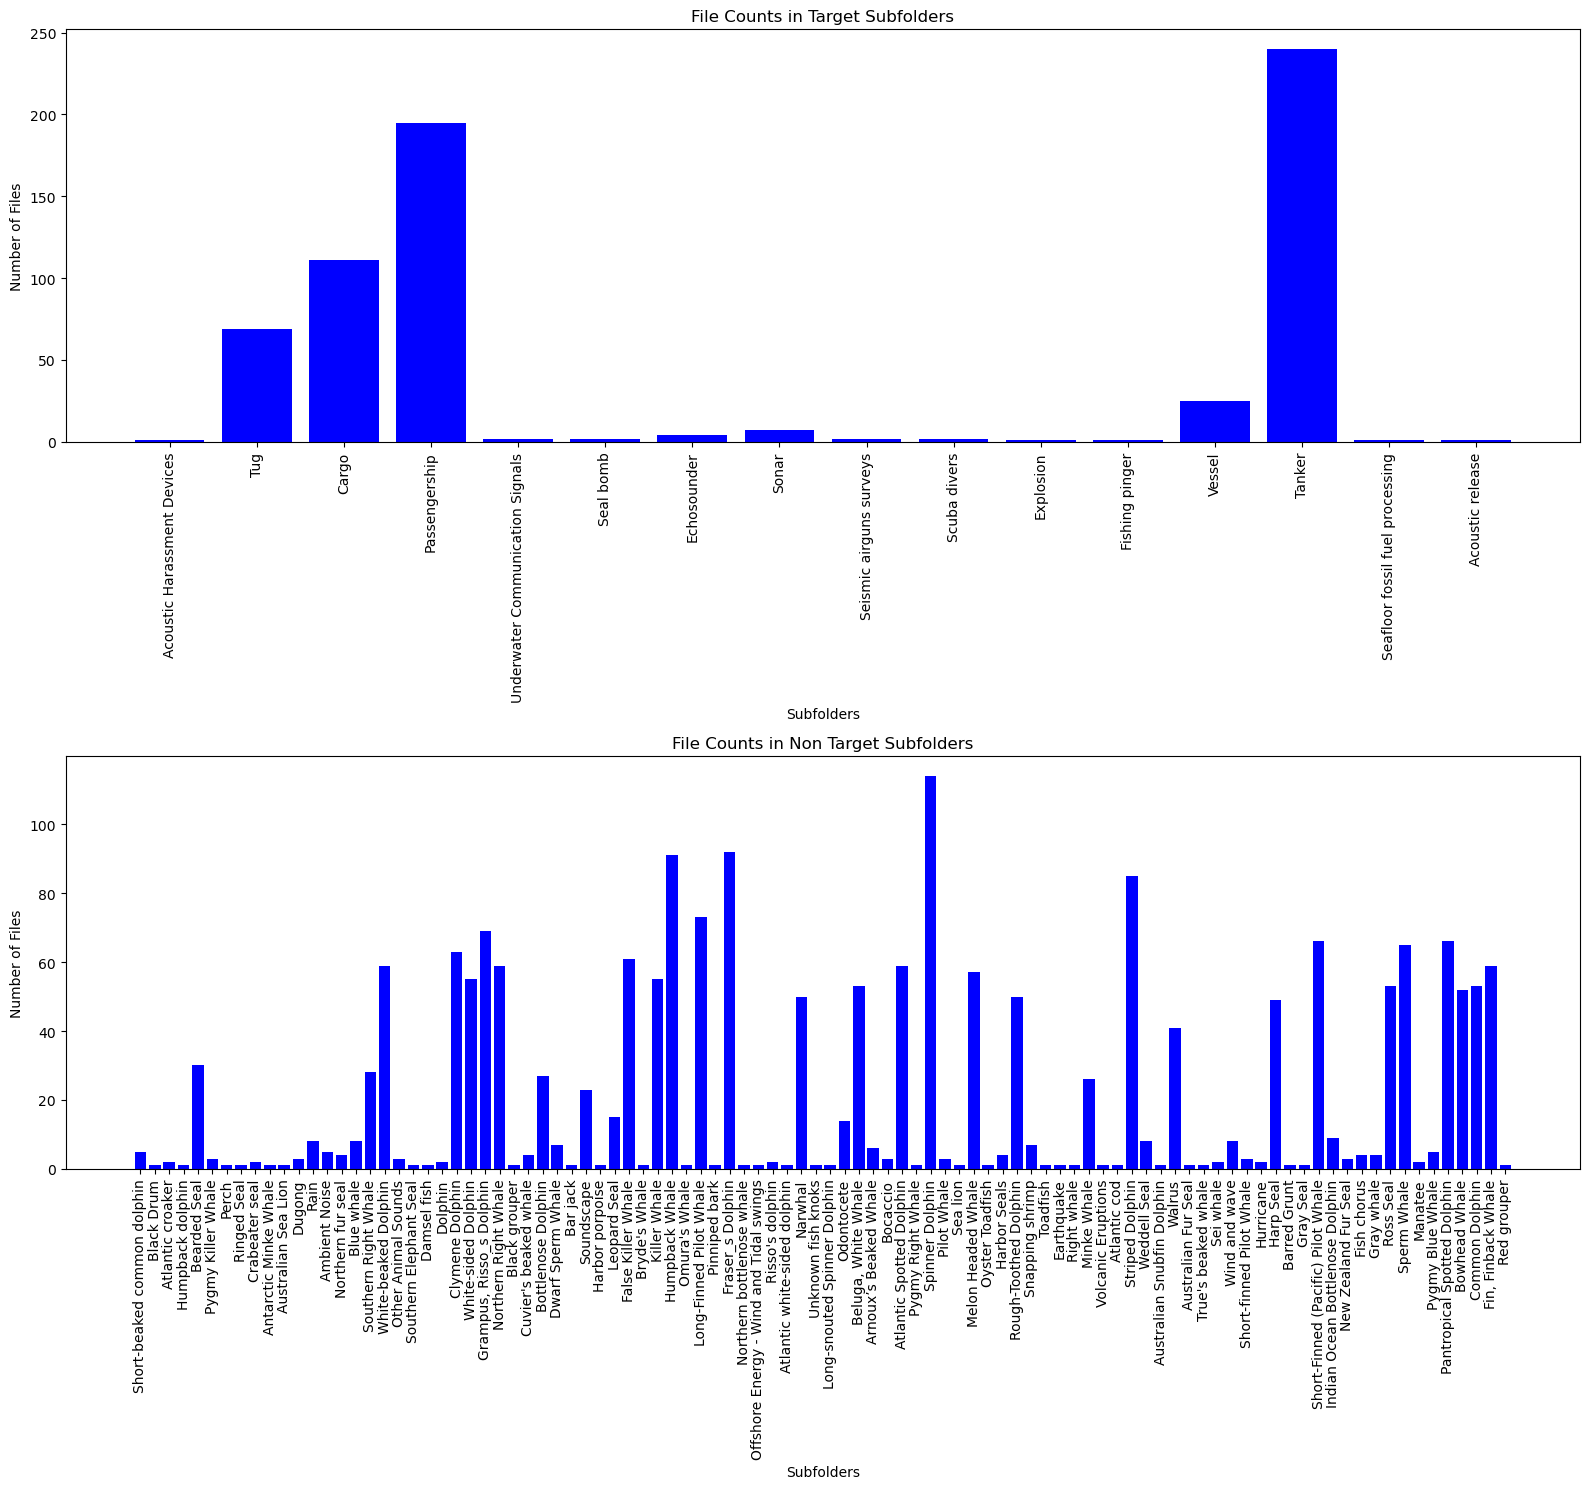

In [2]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt

# Function to count files in each subfolder
def count_files_in_subfolders(parent_folder):
    subfolder_counts = {}
    for subfolder in os.listdir(parent_folder):
        subfolder_path = os.path.join(parent_folder, subfolder)
        if os.path.isdir(subfolder_path):
            file_count = sum([len(files) for r, d, files in os.walk(subfolder_path)])
            subfolder_counts[subfolder] = file_count
    return subfolder_counts

# Paths to the Target and non-target directories
target_path = 'Dataset/Target'
non_target_path = 'Dataset/Non-target'

# Get file counts
target_counts = count_files_in_subfolders(target_path)
non_target_counts = count_files_in_subfolders(non_target_path)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 15))  # Cambia 1 in 2 per disporre i plot uno sotto l'altro
fig.set_figwidth(16)
# Plot for Target
axes[0].bar(target_counts.keys(), target_counts.values(), color='blue')
axes[0].set_title('File Counts in Target Subfolders')
axes[0].set_xlabel('Subfolders')
axes[0].set_ylabel('Number of Files')
axes[0].tick_params(axis='x', rotation=90)  # Ruota le etichette di 90 gradi

# Plot for Non Target
axes[1].bar(non_target_counts.keys(), non_target_counts.values(), color='blue')
axes[1].set_title('File Counts in Non Target Subfolders')
axes[1].set_xlabel('Subfolders')
axes[1].set_ylabel('Number of Files')
axes[1].tick_params(axis='x', rotation=90)  # Ruota le etichette di 90 gradi

# Regola lo spazio tra i plot
plt.tight_layout()

# Mostra i plot
plt.show()


# Analisi  delle Frequenze di Campionamento

2024-05-21 11:37:59,651 - INFO - Numero di core disponibili: 22, utilizzando 11 thread


Progresso: 100.00% completato
Caricamento completato.
Progresso: 100.00%


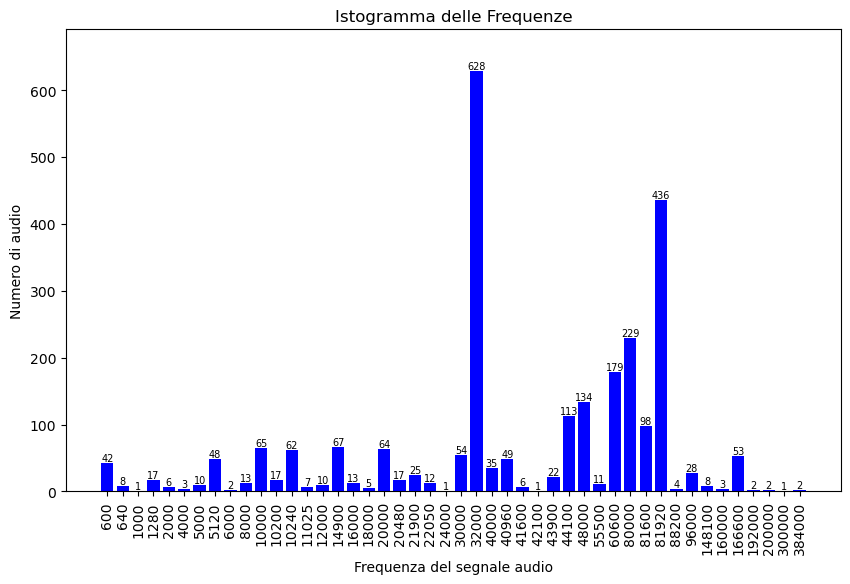

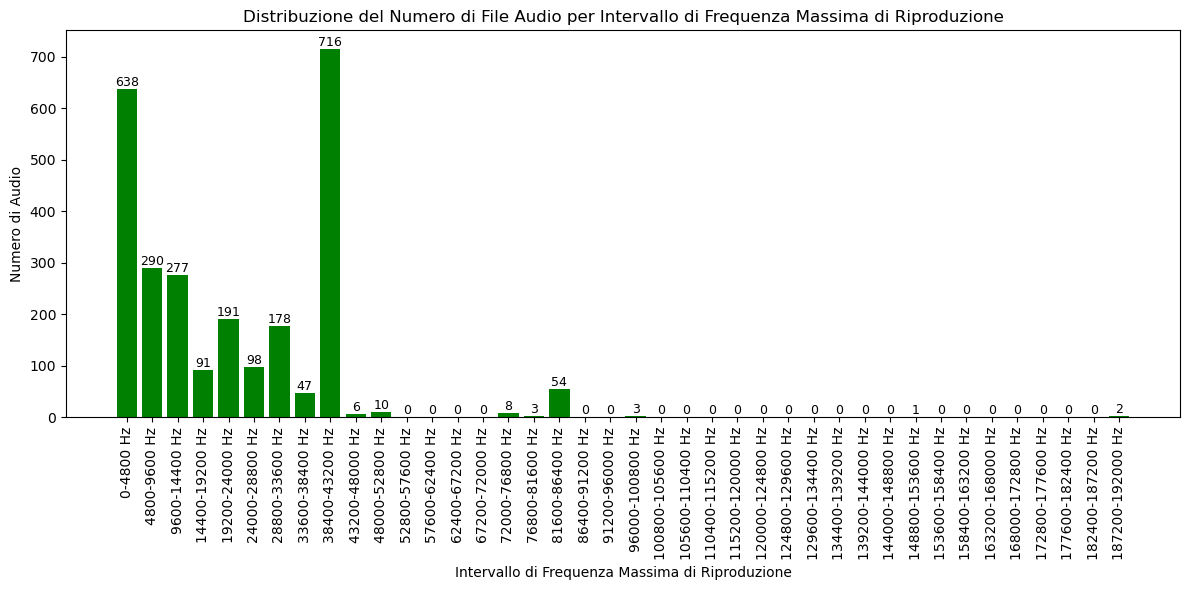

In [1]:
from Analisi_Dati.Lettura_Freq import analyze_audio_files
import matplotlib.pyplot as plt

# Ottieni il dizionario di frequenze e numero di audio associato
frequencies_campionamento, frequencies_max = analyze_audio_files()

# Estrai le chiavi (frequenze) e i valori (numero di audio) dal dizionario
frequency_values = list(frequencies_campionamento.keys())
audio_numbers = list(frequencies_campionamento.values())

# Ordina le frequenze e i numeri di audio in base alle frequenze
sorted_indices = sorted(range(len(frequency_values)), key=lambda k: frequency_values[k])
sorted_frequency_values = [frequency_values[i] for i in sorted_indices]
sorted_audio_numbers = [audio_numbers[i] for i in sorted_indices]

# Imposta le dimensioni della figura
plt.figure(figsize=(10, 6))  # Imposta larghezza a 10 pollici e altezza a 6 pollici

# Crea il grafico a barre
bars = plt.bar(range(len(sorted_frequency_values)), sorted_audio_numbers, color='blue')

# Aggiungi le etichette delle frequenze sotto le barre e ruotale di 90 gradi
plt.xticks(range(len(sorted_frequency_values)), sorted_frequency_values, rotation=90)

plt.xlabel('Frequenza del segnale audio')
plt.ylabel('Numero di audio')
plt.title('Istogramma delle Frequenze')

# Imposta l'asse y con uno spazio aggiuntivo per l'annotazione più alta
max_audio_number = max(sorted_audio_numbers)
plt.ylim(0, max_audio_number * 1.1)  # Aumenta l'asse y del 10%

# Aggiungi annotazioni sopra le barre
for bar, audio_count in zip(bars, sorted_audio_numbers):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(audio_count),
             ha='center', va='bottom', color='black',fontsize=7)

plt.show()  # Mostra il grafico

# Trova la massima frequenza massima di riproduzione tra tutti i file audio
max_playback_frequency = max(frequencies_max.keys())

# Definisci il numero di intervalli di frequenza desiderati
num_intervals = 40

# Calcola l'ampiezza di ciascun intervallo di frequenza
frequency_step = max_playback_frequency / num_intervals

# Inizializza il dizionario per contare il numero di file audio per ciascun intervallo di frequenza
frequency_counts = {f'{i * frequency_step:.0f}-{(i + 1) * frequency_step:.0f} Hz': 0 for i in range(num_intervals)}

# Aggiorna il conteggio dei file audio per ciascun intervallo di frequenza
for frequency, count in frequencies_max.items():
    interval = min(int(frequency / frequency_step), num_intervals - 1)  # Assicura che non superi il numero massimo di intervalli
    interval_key = f'{interval * frequency_step:.0f}-{(interval + 1) * frequency_step:.0f} Hz'
    frequency_counts[interval_key] += count

# Crea il grafico a barre
plt.figure(figsize=(12, 6))
bars = plt.bar(frequency_counts.keys(), frequency_counts.values(), color='green')

# Aggiungi l'annotazione del testo sopra ciascuna barra
for bar, count in zip(bars, frequency_counts.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=9, color='black')

# Personalizza l'aspetto del grafico
plt.xlabel('Intervallo di Frequenza Massima di Riproduzione')
plt.ylabel('Numero di Audio')
plt.title(f'Distribuzione del Numero di File Audio per Intervallo di Frequenza Massima di Riproduzione')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Abbiamo optato per la frequenza massima di 43200 Hz sulla base di un'analisi dei file audio disponibili, che ha rivelato che la maggior parte di essi presentava una frequenza massima di riproduzione al di sotto di questa soglia. Questo ci ha portato a selezionare una frequenza di campionamento che fosse sufficientemente alta da catturare tutti i dettagli essenziali del segnale audio senza sprecare risorse computazionali e di archiviazione campionando a una frequenza maggiore di quella necessaria.

L'applicazione del criterio di Nyquist ha poi confermato che la frequenza di campionamento scelta, pari a 86400 campioni al secondo, era adeguata per evitare l'aliasing e garantire una rappresentazione accurata del segnale nel dominio digitale. In questo modo, abbiamo potuto massimizzare l'efficienza e la qualità del nostro processo di campionamento audio.

# Analisi e Visualizzazione della Distribuzione delle Durate dei File Audio

Progresso: 100.00%
Informazioni audio lette con successo.
Totale file audio: 2613
La mediana delle durate dei file audio è: 0 minuti e 3 secondi


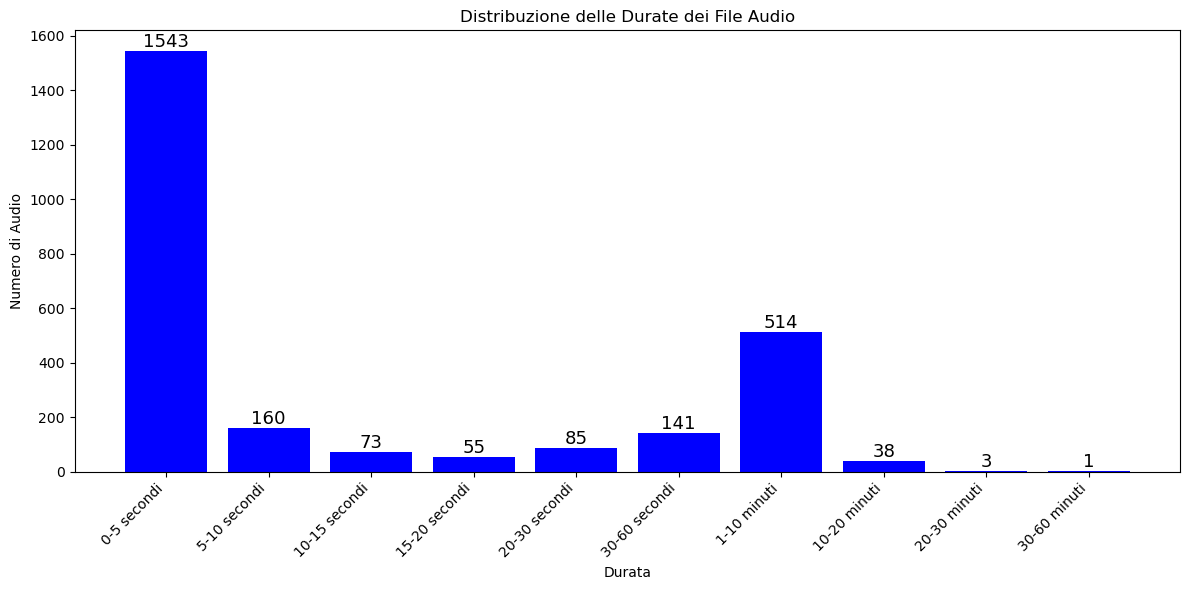

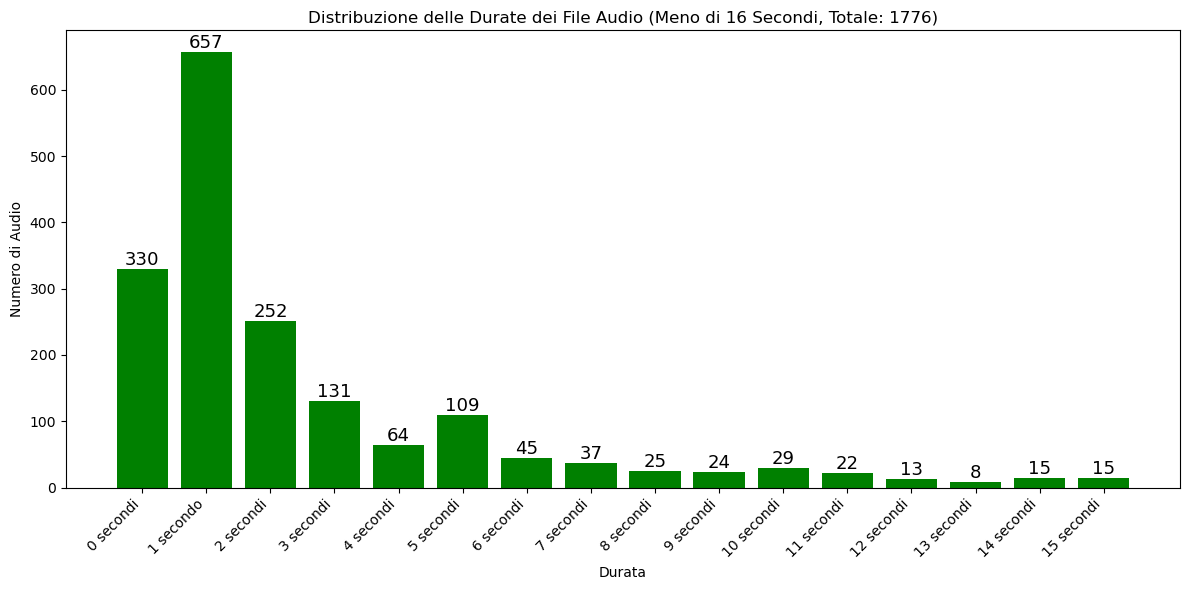

In [1]:
from Analisi_Dati.Lettura_Durata import audio_info
import matplotlib.pyplot as plt

# Funzione per determinare l'intervallo di tempo
def get_interval(minutes, seconds):
    if minutes == 0:
        if seconds <= 5:
            return "0-5 secondi"
        if seconds <= 10:
            return "5-10 secondi"
        if seconds <= 15:
            return "10-15 secondi"
        if seconds <= 20:
            return "15-20 secondi"
        if seconds <= 30:
            return "20-30 secondi"
        return "30-60 secondi"
    if minutes <= 10:
        return "1-10 minuti"
    if minutes <= 20:
        return "10-20 minuti"
    if minutes <= 30:
        return "20-30 minuti"
    return "30-60 minuti"

# Lettura dei dati audio
audio_info_dict = audio_info()

# Definizione degli intervalli
intervals = {
    "0-5 secondi": 0,
    "5-10 secondi": 0,
    "10-15 secondi": 0,
    "15-20 secondi": 0,
    "20-30 secondi": 0,
    "30-60 secondi": 0,
    "1-10 minuti": 0,
    "10-20 minuti": 0,
    "20-30 minuti": 0,
    "30-60 minuti": 0,
}

# Conteggio dei file audio per intervallo
for minutes, seconds in audio_info_dict.values():
    interval = get_interval(minutes, seconds)
    intervals[interval] += 1

# Estrazione dei dati per il grafico della distribuzione generale
labels, counts = zip(*intervals.items())

# Creazione del grafico a barre per la distribuzione generale
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, color='blue')

# Annotazione del testo sopra ciascuna barra
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=13, color='black')

plt.xlabel('Durata')
plt.ylabel('Numero di Audio')
plt.title('Distribuzione delle Durate dei File Audio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Definizione degli intervalli per durate inferiori a 15 secondi
short_intervals = {f"{i} secondi" if i != 1 else "1 secondo": 0 for i in range(16)}

# Conteggio totale dei file audio
total_files = 0

# Conteggio dei file audio per intervallo inferiore a 15 secondi
for minutes, seconds in audio_info_dict.values():
    if minutes == 0 and seconds <= 15:
        interval_label = f"{seconds} secondi" if seconds != 1 else "1 secondo"
        short_intervals[interval_label] += 1
        total_files += 1

# Estrazione dei dati per il grafico della distribuzione breve
short_labels, short_counts = zip(*short_intervals.items())

# Creazione del grafico a barre per la distribuzione breve
plt.figure(figsize=(12, 6))
short_bars = plt.bar(short_labels, short_counts, color='green')

# Annotazione del testo sopra ciascuna barra
for bar, count in zip(short_bars, short_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=13, color='black')

plt.xlabel('Durata')
plt.ylabel('Numero di Audio')
plt.title(f'Distribuzione delle Durate dei File Audio (Meno di 16 Secondi, Totale: {total_files})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Per determinare una durata rappresentativa e ottimale per il taglio dei file audio, abbiamo calcolato la mediana delle durate comprese tra 0 e 15 secondi, che è risultata essere pari a 3 secondi. Questo valore centrale rappresenta la durata tipica degli audio brevi nel dataset: metà dei file audio ha una durata inferiore o pari a 3 secondi, mentre l'altra metà ha una durata superiore. Utilizzare la mediana come riferimento ci assicura una rappresentazione equa della maggior parte dei file audio.

Riducendo la durata dei file audio a 3 secondi, ottimizziamo l'efficienza computazionale durante la fase di addestramento del modello di apprendimento. Questo si traduce in un minor utilizzo di risorse computazionali per il processamento e l'analisi dei file audio più brevi, riducendo i tempi di addestramento e migliorando le prestazioni complessive del modello. Inoltre, troncando i file audio a una durata standard di 3 secondi, garantiamo uniformità nei dati di input, il che è cruciale per il modello di apprendimento in quanto lavora meglio con input di dimensioni costanti. Questa uniformità riduce la variabilità e migliora la coerenza dei risultati del modello.

# Standardizzazione del Bit Depth e analisi tipo file

In [5]:
from Analisi_Dati.Bit_Depth import audio_info

bit_depth_count = audio_info()

Progresso: 100.00%
Totale file audio (.wav): 2546
Totale file audio (.mp3): 67

Contatore per ogni Bit Depth differente:
Bit Depth Unsigned 8 bit PCM bit: 17 file
Bit Depth Signed 16 bit PCM bit: 1895 file
Bit Depth Signed 24 bit PCM bit: 23 file
Bit Depth 32 bit float bit: 605 file
Bit Depth Signed 32 bit PCM bit: 6 file


Per garantire coerenza e qualità nei file audio, è importante convertire i file MP3 in WAV. I file MP3 utilizzano una compressione lossy che riduce la qualità del suono, mentre i file WAV sono lossless e mantengono tutte le informazioni audio originali. Sebbene la qualità persa con la compressione MP3 non possa essere recuperata, la conversione in WAV previene ulteriori perdite di qualità e standardizza il formato dei file audio.

È inoltre essenziale standardizzare il bit depth, e la scelta di utilizzare 16 bit come standard presenta diversi vantaggi. Prima di tutto, la maggior parte dei file audio già utilizza questo formato, quindi convertirli tutti a 16 bit assicura uniformità nel dataset. Inoltre, i 16 bit offrono una qualità del suono adeguata per la maggior parte delle applicazioni audio, garantendo un'esperienza uditiva soddisfacente. L'efficienza computazionale è un altro fattore cruciale, infatti riducendo la quantità di dati da elaborare, l'utilizzo di 16 bit migliora significativamente l'efficienza nei processi di elaborazione audio, rendendo più agevole e veloce il flusso di lavoro. Pertanto, convertire tutti i file audio a 16 bit signed PCM rappresenta un buon compromesso tra qualità, coerenza ed efficienza computazionale, ottimizzando il dataset per l'uso previsto e garantendo una gestione fluida e efficiente dei file audio.

# Scelta conversione Canale Audio

In [1]:
from Analisi_Dati.Audio_Analysis import analyze_audio_files
audio_file_info = analyze_audio_files()

Progress: 100.00%
Total mono channel audio: 2548
Total multi-channel audio: 65
Audio with 2 channels: 65


La decisione di convertire i dati audio multicanale in formato monocanale si basa sull'osservazione che la maggior parte dei dati disponibili è già in questa forma, assicurando uniformità e coerenza nel loro trattamento. Questa conversione riduce anche la complessità computazionale e le risorse necessarie per l'allenamento del modello, migliorando l'efficienza complessiva del processo di apprendimento e facilitando il raggiungimento di risultati significativi.